In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import  scipy.cluster.hierarchy as sch
from sklearn.cluster import  AgglomerativeClustering
from  sklearn.cluster import KMeans
from sklearn.cluster import  DBSCAN
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
    ## heirarchical clustering

<AxesSubplot:xlabel='Assault', ylabel='Density'>

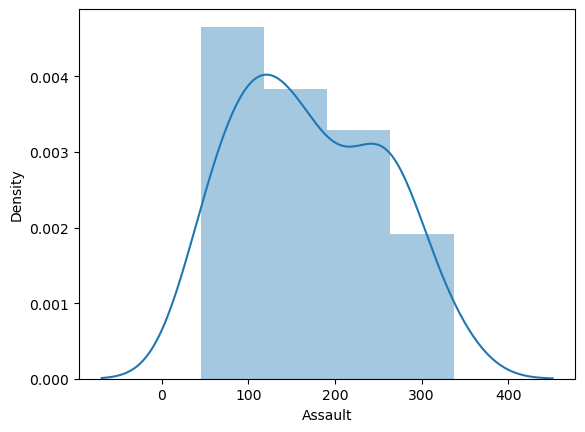

In [7]:
sns.distplot(df.Assault)

<AxesSubplot:xlabel='Murder', ylabel='Density'>

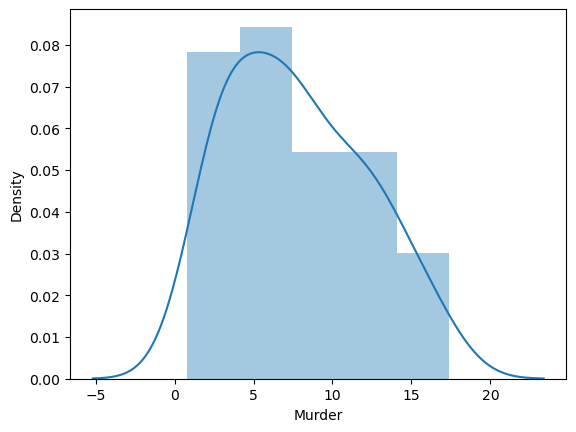

In [8]:
sns.distplot(df.Murder)

<AxesSubplot:xlabel='UrbanPop', ylabel='Density'>

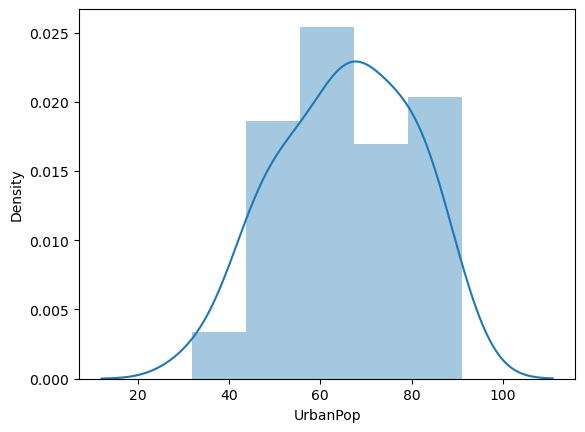

In [9]:
sns.distplot(df.UrbanPop)

<AxesSubplot:xlabel='Rape', ylabel='Density'>

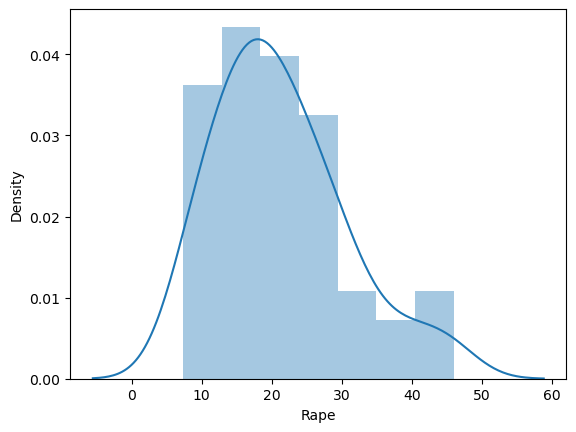

In [10]:
sns.distplot(df.Rape)

In [11]:
## normalization function

In [12]:
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df_norm = minmax_func(df.iloc[:,1:])

In [14]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [15]:
## creating Dendrogram

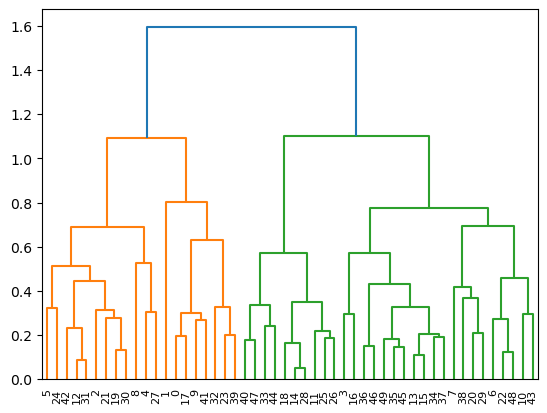

In [16]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))


In [17]:
## creating clusters

In [18]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [19]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [20]:
df['h_clusterid'] = y_hc
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [21]:
df[df['h_clusterid']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [22]:
df[df['h_clusterid']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
29,New Jersey,7.4,159,89,18.8,1


In [23]:
df[df['h_clusterid']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [24]:
df[df['h_clusterid']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3


In [25]:
df.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [26]:
##   for KMeans Clustering

In [27]:
## Applying Kmeans method for same data


In [28]:
df2=pd.read_csv('crime_data.csv')
df2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [29]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [30]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [31]:
x=norm_func(df2.iloc[:,1:])
x

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


In [32]:
## Normalization Function

In [39]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_df_df = scaler.fit_transform(df2.iloc[:,1:])

In [40]:
scaled_df_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [41]:
### To find Kvalue  for clusters we use WcSS

In [42]:
#WCSS (Within Cluster Sum of Squares)

[195.99999999999997, 102.86240049441736, 78.4870840955563, 56.403173458292834, 49.509860214843684, 43.04891476407623, 39.71139791909336, 33.99364062989211, 32.05235173660421, 27.7454066091801]


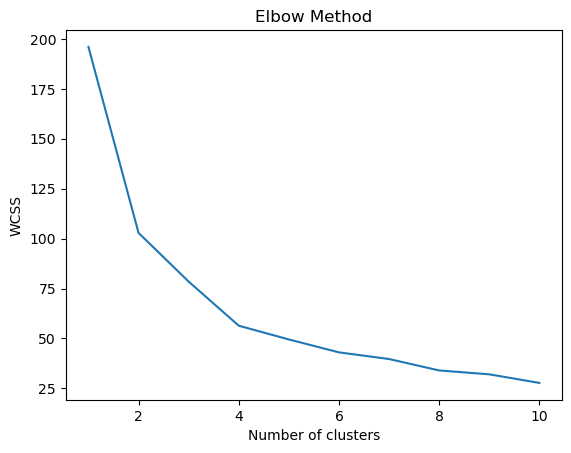

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#Building Cluster algorithm

In [51]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=4, random_state=0)

In [52]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [106]:
df2['clusterid_new'] = clusters_new.labels_
df2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [107]:
clusters_new.cluster_centers_

array([[-0.48943754, -0.38260013,  0.57582979, -0.26165379],
       [ 0.6950701 ,  1.03944141,  0.72263703,  1.27693964],
       [-0.96154072, -1.106601  , -0.93010687, -0.96676331],
       [ 1.41188984,  0.8743346 , -0.81452109,  0.01927104]])

In [108]:
df2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [109]:
df2['clusterid_new'].value_counts()

0    16
1    13
2    13
3     8
Name: clusterid_new, dtype: int64

In [110]:
## DBScan Clustering Method 

In [111]:
df3=pd.read_csv('crime_data.csv')
df3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [112]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [113]:
crime3=df3.iloc[:,1:]
crime3

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [117]:
array=crime3.values

In [118]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [119]:
stscaler = StandardScaler().fit(array)
y = stscaler.transform(array)


In [120]:
y

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [121]:
stscaler = StandardScaler()
y=stscaler.fit_transform(array)
y

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [122]:
dbscan =DBSCAN(eps=1.3,min_samples=6)
dbscan.fit(y)

DBSCAN(eps=1.3, min_samples=6)

In [123]:
######Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2,  1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [124]:
df3['Cluster']=pd.DataFrame(dbscan.labels_)
df3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [125]:
df3['Cluster'].value_counts()

 2    32
 1     8
 0     6
-1     4
Name: Cluster, dtype: int64

In [126]:
####The value -1 is a noisy aka outliers

In [127]:
###  To Find Percentage Of Noise  points
(len(df3[df3['Cluster']==-1])/len(df3))*100


8.0

In [128]:
y=metrics.silhouette_score(y,dbscan.labels_)
y

0.28052628821964976

In [129]:
def dbscan(y,eps,min_samples):
    ss=StandardScaler()
    y=ss.fit_transform(y)
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(y)
    y_pred=db.fit_predict(y)
    plt.scatter(y[:,0],y[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

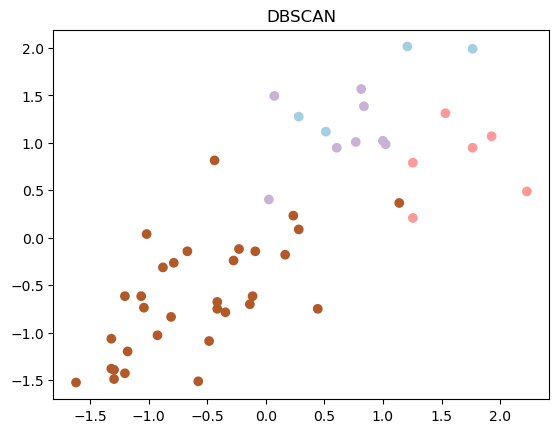

In [130]:
dbscan(array,1.3,6)